In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("train.csv")
df['Survived_status']=df['Survived'].apply(lambda x: "No" if x==0 else "Yes")
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Survived_status  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [3]:
print("Survival Status: \n",df['Survived'].value_counts())
print("Passenger Class: ",*df['Pclass'].unique())
print("Embarked City: ",*df['Embarked'].unique())
print("# of parents / children aboard the Titanic: ",*df['Parch'].unique())
print("# of siblings / spouses aboard the Titanic: ",*df['SibSp'].unique())

Survival Status: 
 0    549
1    342
Name: Survived, dtype: int64
Passenger Class:  3 1 2
Embarked City:  S C Q nan
# of parents / children aboard the Titanic:  0 1 2 5 3 4 6
# of siblings / spouses aboard the Titanic:  1 0 3 4 2 5 8


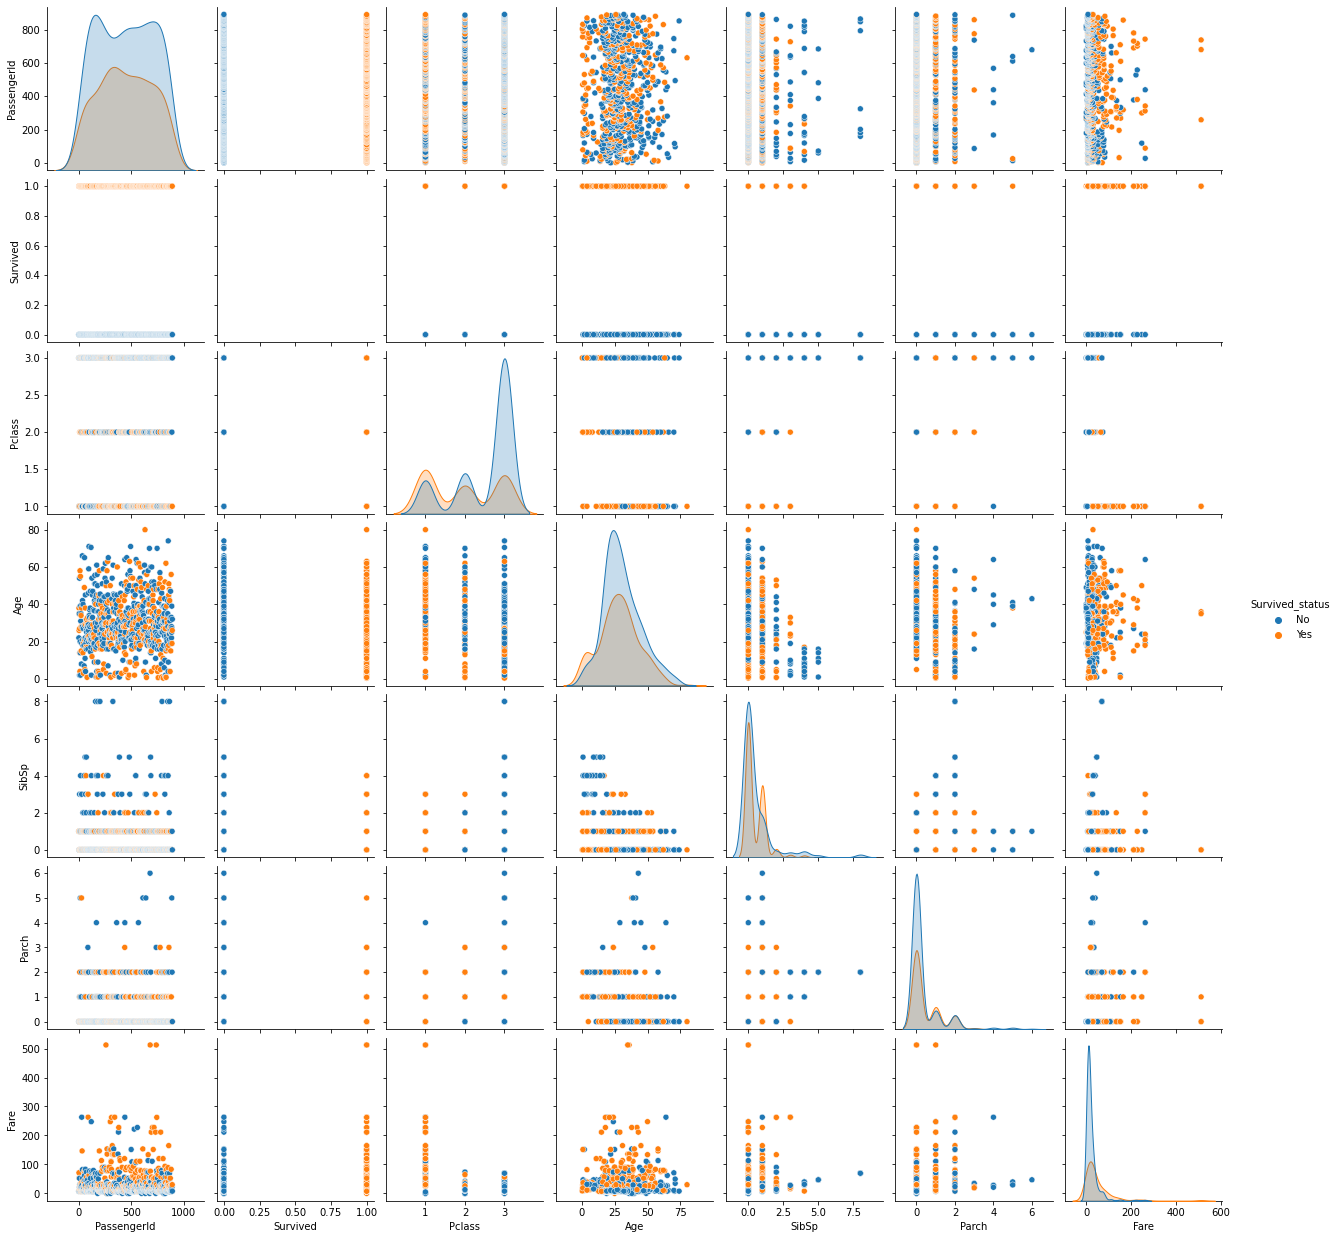

In [4]:
sns.pairplot(df,hue='Survived_status')

Correlation matrix: 
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

Heat Map: 
 AxesSubplot(0.125,0.125;0.62x0.755)


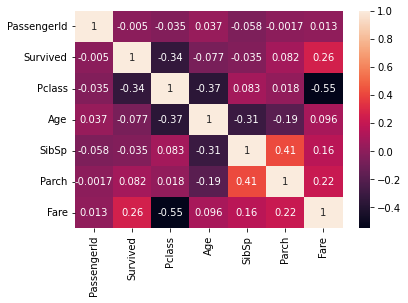

In [5]:
print("Correlation matrix: \n",df.corr())
print("\nHeat Map: \n",sns.heatmap(df.corr(),annot=True))

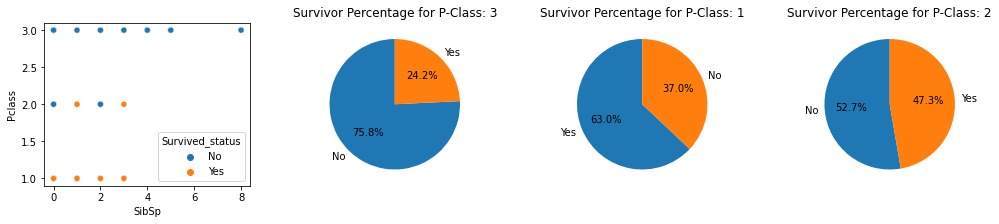

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,3))
class_1= df.loc[(df['Pclass']==1) ,:]['Survived_status'].value_counts()
class_2= df.loc[(df['Pclass']==2) ,:]['Survived_status'].value_counts()
class_3= df.loc[(df['Pclass']==3) ,:]['Survived_status'].value_counts()
plt.subplot(1,4,1)
sns.scatterplot(x='SibSp',y='Pclass',data=df,hue='Survived_status').set(title="")
plt.subplot(1,4,2)
plt.pie(class_3.values,labels=class_3.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 3")
plt.subplot(1,4,3)
plt.pie(class_1.values,labels=class_1.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 1")
plt.subplot(1,4,4)
plt.pie(class_2.values,labels=class_2.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 2")
plt.show()

In [7]:
x = df.copy()
x['generations'] = df['Age'].apply(lambda x: "young" if x<=20 else "adult" if x<=50 else "old")
pd.DataFrame(x.groupby(['Pclass','Sex','generations','Survived_status'])['Fare'].describe())

count        mean         std  \
Pclass Sex    generations Survived_status                                  
1      female adult       No                 2.0   90.131250   86.859229   
                          Yes               56.0  113.639659   84.547919   
              old         Yes               22.0   85.552836   33.815546   
              young       No                 1.0  151.550000         NaN   
                          Yes               13.0  107.540708   78.028584   
       male   adult       No                37.0   64.187381   53.674081   
                          Yes               31.0   81.947994  118.470239   
              old         No                37.0   55.215541   59.129922   
                          Yes               10.0   35.400000   15.684157   
              young       No                 3.0  141.666667  108.718643   
                          Yes                4.0  116.072900   28.703179   
2      female adult       No                 5.0   19.800000    6.534524   
                          Yes               50.0   21.459584   11.958486   
              old         No                 1.0   10.500000         NaN   
                          Yes                4.0   21.087500    9.088305   
              young       Yes               16.0   25.181250    8.699597   
       male   adult       No                64.0   21.270637   15.552742   
                          Yes                4.0   16.250000    6.500000   
              old         No                18.0   11.440278   10.854821   
                          Yes                3.0   12.454167    1.746440   
              young       No                 9.0   22.916667   20.991814   
                          Yes               10.0   25.625420    9.949187   
3      female adult       No                32.0   16.933466   10.912653   
                          Yes               22.0   13.030109    6.230672   
              old         No                17.0   23.975006   22.799548   
                          Yes               26.0   11.685900    5.854416   
              young       No                23.0   20.618117   10.646278   
                          Yes               24.0   12.789588    6.063272   
       male   adult       No               145.0    9.788214    5.994189   
                          Yes               23.0   14.432422   16.911309   
              old         No                94.0   12.622249   13.705076   
                          Yes                9.0   21.955544   20.276698   
              young       No                61.0   17.304234   13.532846   
                          Yes               15.0   13.513340    6.718884   

                                                min         25%        50%  \
Pclass Sex    generations Survived_status                                    
1      female adult       No                28.7125   59.421875   90.13125   
                          Yes               25.9292   57.716700   83.31665   
              old         Yes               26.5500   63.362500   78.73335   
              young       No               151.5500  151.550000  151.55000   
                          Yes               26.2833   57.000000   86.50000   
       male   adult       No                 0.0000   29.700000   52.00000   
                          Yes               26.2875   26.550000   52.55420   
              old         No                 0.0000   26.550000   32.32080   
                          Yes               26.5500   29.775000   30.25000   
              young       No                53.1000   81.000000  108.90000   
                          Yes               81.8583  103.627050  115.44165   
2      female adult       No                13.0000   13.000000   21.00000   
                          Yes               10.5000   13.000000   19.12500   
              old         No                10.5000   10.500000   10.50000   
                          Yes               12.3500   15.0

In [8]:
pclass_age = pd.DataFrame(df.groupby('Pclass').describe()[['Age','Fare']].reset_index())
print(df.loc[df['Fare']==0.0,:].groupby('Pclass').describe().iloc[:,0])
print(df.loc[df['Fare']==0.0,:].groupby('Sex').describe().iloc[:,0])
pclass_age

Pclass
1    5.0
2    6.0
3    4.0
Name: (PassengerId, count), dtype: float64
Sex
male    15.0
Name: (PassengerId, count), dtype: float64


Pclass    Age                                                       Fare  \
          count       mean        std   min   25%   50%   75%   max  count   
0      1  186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
1      2  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
2      3  355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                                                                 
        mean        std  min       25%      50%   75%       max  
0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292  
1  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000  
2  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [9]:
pd.DataFrame(df[df['Fare']==0].groupby(['Embarked','Sex','Survived'])['Fare'].describe())

count  mean  std  min  25%  50%  75%  max
Embarked Sex  Survived                                           
S        male 0          14.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
              1           1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0

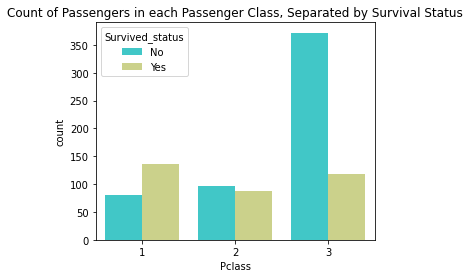

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='Pclass',data=df, palette='rainbow',hue='Survived_status').set(title="Count of Passengers in each Passenger Class, Separated by Survival Status")
plt.show()

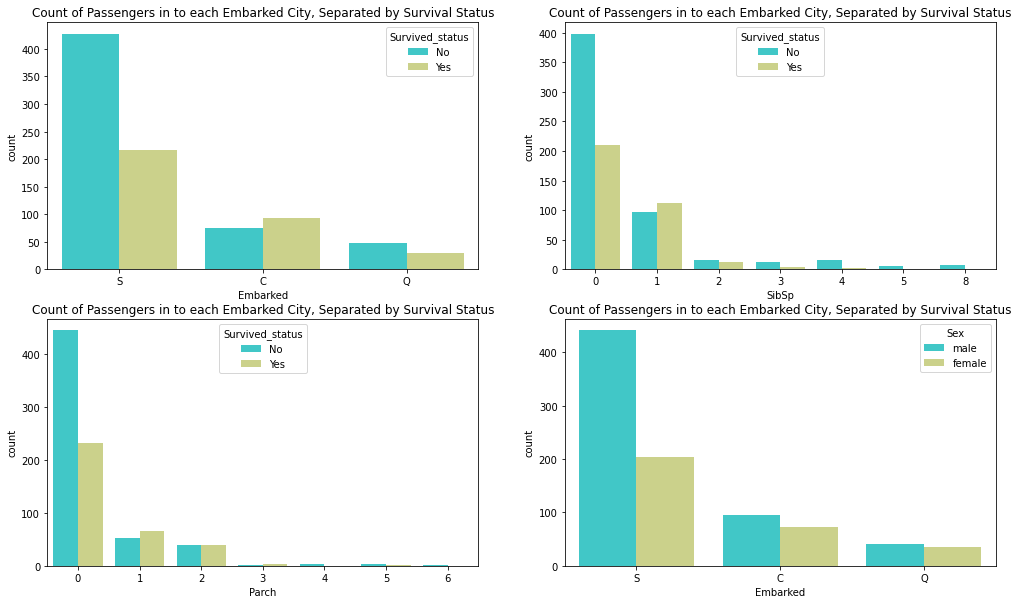

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
sns.countplot(x='Embarked',data=df, palette='rainbow',hue='Survived_status',ax=axes[0][0]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='SibSp',data=df, palette='rainbow',hue='Survived_status',ax=axes[0][1]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='Parch',data=df, palette='rainbow',hue='Survived_status',ax=axes[1][0]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
sns.countplot(x='Embarked',data=df, palette='rainbow',hue='Sex',ax=axes[1][1]).set(title="Count of Passengers in to each Embarked City, Separated by Survival Status")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

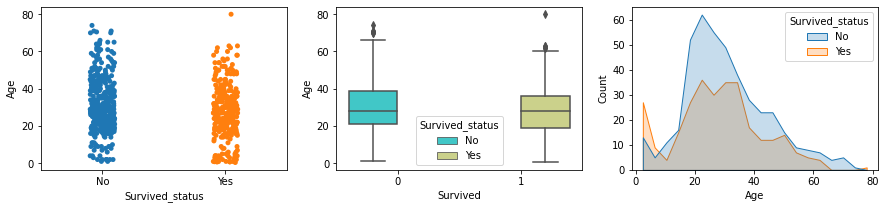

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.stripplot(x='Survived_status', y='Age', data=df,ax=axes[0])
sns.boxplot(x='Survived',y='Age',hue='Survived_status',data=df, palette='rainbow',ax=axes[1])
sns.histplot(data=df,x='Age',ax=axes[2],hue='Survived_status',element="poly")

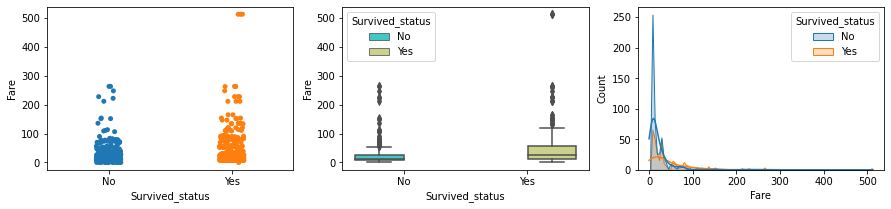

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.stripplot(x='Survived_status', y='Fare', data=df,ax=axes[0])
sns.boxplot(x='Survived_status',y='Fare',hue='Survived_status',data=df, palette='rainbow',ax=axes[1])
sns.histplot(data=df,x='Fare',ax=axes[2],hue='Survived_status',bins=100,kde=True,element='poly')
plt.show()

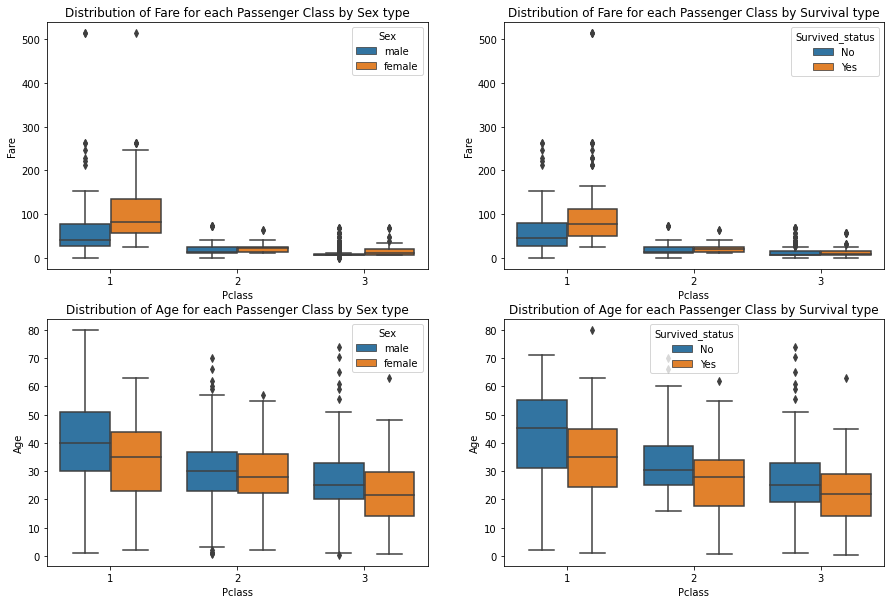

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df,x='Pclass',y='Fare',hue='Sex',ax=axes[0][0]).set(title="Distribution of Fare for each Passenger Class by Sex type")
sns.boxplot(data=df,x='Pclass',y='Fare',hue='Survived_status',ax=axes[0][1]).set(title="Distribution of Fare for each Passenger Class by Survival type")
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex',ax=axes[1][0]).set(title="Distribution of Age for each Passenger Class by Sex type")
sns.boxplot(data=df,x='Pclass',y='Age',hue='Survived_status',ax=axes[1][1]).set(title="Distribution of Age for each Passenger Class by Survival type")
plt.show()

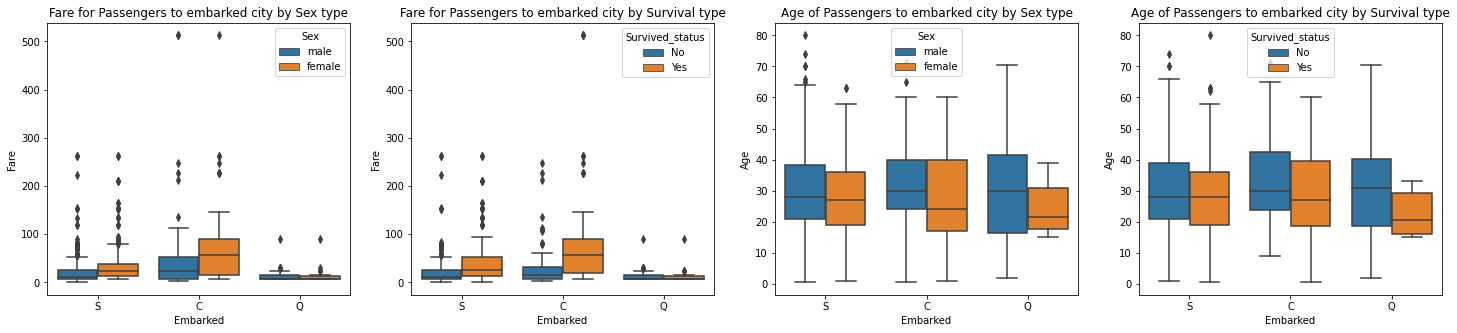

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Sex',ax=axes[0]).set(title="Fare for Passengers to embarked city by Sex type")
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Survived_status',ax=axes[1]).set(title="Fare for Passengers to embarked city by Survival type")
sns.boxplot(data=df,x='Embarked',y='Age',hue='Sex',ax=axes[2]).set(title="Age of Passengers to embarked city by Sex type")
sns.boxplot(data=df,x='Embarked',y='Age',hue='Survived_status',ax=axes[3]).set(title="Age of Passengers to embarked city by Survival type")
plt.show()

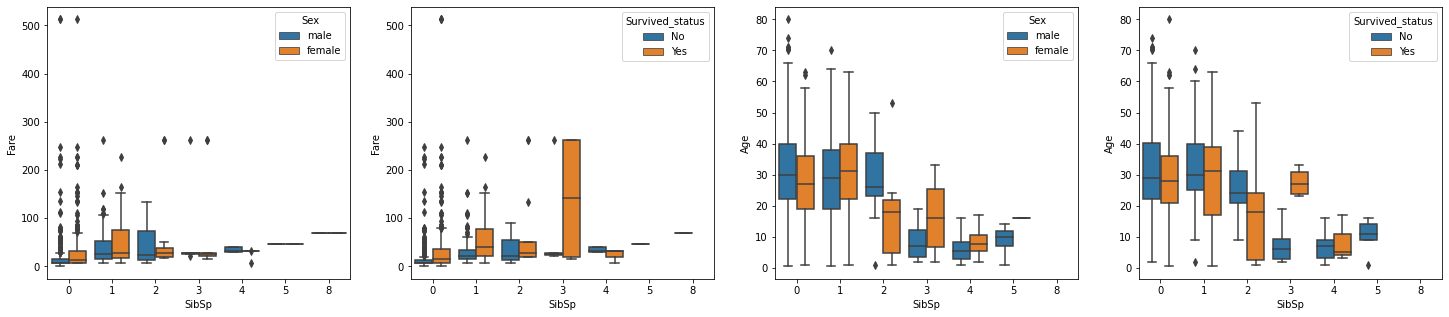

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
sns.boxplot(data=df,x='SibSp',y='Fare',hue='Sex',ax=axes[0])
sns.boxplot(data=df,x='SibSp',y='Fare',hue='Survived_status',ax=axes[1])
sns.boxplot(data=df,x='SibSp',y='Age',hue='Sex',ax=axes[2])
sns.boxplot(data=df,x='SibSp',y='Age',hue='Survived_status',ax=axes[3])
plt.show()

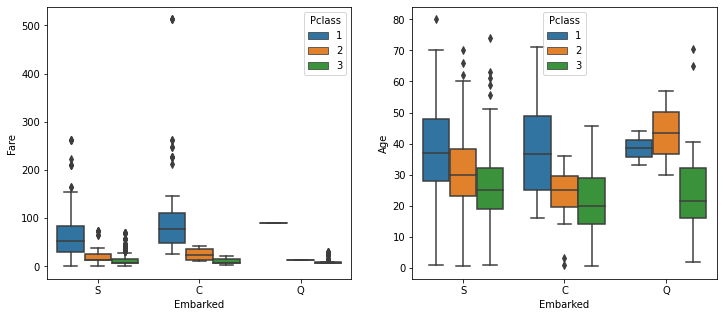

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.boxplot(data=df,x='Embarked',y='Fare',hue='Pclass',ax=axes[0])
sns.boxplot(data=df,x='Embarked',y='Age',hue='Pclass',ax=axes[1])
plt.show()

In [18]:
df['initials'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

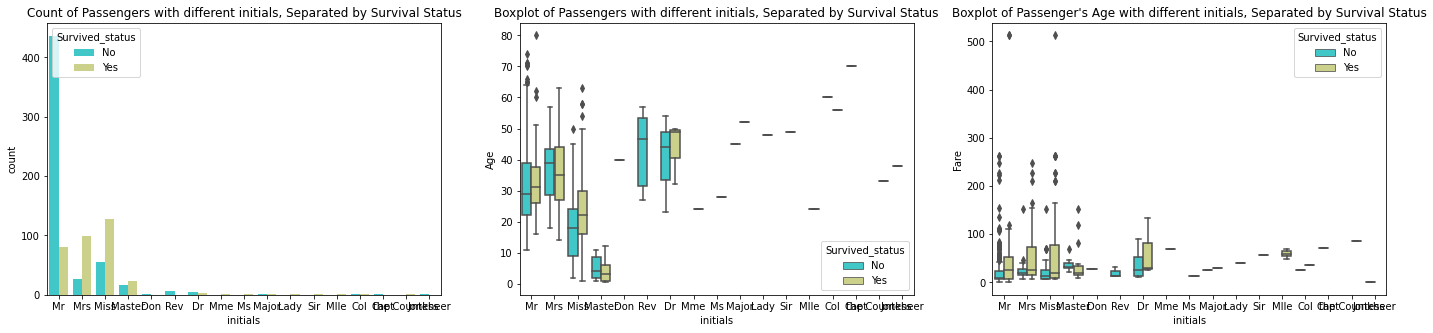

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
sns.countplot(x='initials',data=df, palette='rainbow',hue='Survived_status',ax=axes[0]).set(title="Count of Passengers with different initials, Separated by Survival Status")
sns.boxplot(x='initials',y='Age',data=df, palette='rainbow',hue='Survived_status',ax=axes[1]).set(title="Boxplot of Passengers with different initials, Separated by Survival Status")
sns.boxplot(x='initials',y='Fare',data=df, palette='rainbow',hue='Survived_status',ax=axes[2]).set(title="Boxplot of Passenger's Age with different initials, Separated by Survival Status")
plt.show()

In [20]:
df[df['Cabin']=="G6"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Yes,Miss
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,No,Miss
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,No,Mrs
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,Yes,Mrs


In [21]:
df[df['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Yes,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Yes,Mrs


In [22]:
df.groupby(['Embarked','Survived_status'])['Fare'].describe()['count']

Embarked  Survived_status
C         No                  75.0
          Yes                 93.0
Q         No                  47.0
          Yes                 30.0
S         No                 427.0
          Yes                217.0
Name: count, dtype: float64

In [23]:
cab = df['Cabin'].value_counts()[df['Cabin'].value_counts()>1].index
multiple_families_cabin = []
for cabin in df['Cabin'].unique():
    families = list(set(df[df['Cabin']==cabin]['Name'].apply(lambda x: x.split(",")[0]).values))
    if len(families)>1:
        multiple_families_cabin.append(cabin)
df['Surname'] = df['Name'].apply(lambda x: x.split(",")[0])
print("Cabin having multiple Families: ",multiple_families_cabin)
df[df['Cabin'].isin(multiple_families_cabin)].groupby(['Cabin','Ticket','Embarked','Surname','Survived_status'])['Fare'].describe()[['count','50%']]

Cabin having multiple Families:  ['G6', 'C52', 'B28', 'F33', 'F G73', 'E101', 'E33', 'B77', 'C125', 'D', 'C124', 'B35', 'D20', 'E25', 'B51 B53 B55', 'B5', 'E24', 'D17']


count  \
Cabin       Ticket          Embarked Surname                Survived_status          
B35         PC 17477        C        Aubart                 Yes                1.0   
                                     Sagesser               Yes                1.0   
B5          24160           S        Allen                  Yes                1.0   
                                     Madill                 Yes                1.0   
B51 B53 B55 695             S        Carlsson               No                 1.0   
            PC 17755        C        Cardeza                Yes                1.0   
B77         110152          S        Cherry                 Yes                1.0   
                                     Rothes                 Yes                1.0   
C124        113028          S        Klaber                 No                 1.0   
            113043          S        Partner                No                 1.0   
C125        PC 17582        S        Graham                 Yes                1.0   
                                     Shutes                 Yes                1.0   
C52         110564          S        Bjornstrom-Steffansson Yes                1.0   
            19947           S        Woolner                Yes                1.0   
D           28551           S        Ball                   Yes                1.0   
            SC/AH Basle 541 C        Jerwan                 Yes                1.0   
            SC/Paris 2163   C        Levy                   No                 1.0   
D17         17465           S        Leader                 Yes                1.0   
            17466           S        Swift                  Yes                1.0   
D20         36947           C        Eustis                 Yes                1.0   
                                     Stephenson             Yes                1.0   
E101        226593          Q        Keane                  Yes                1.0   
            27267           S        Webber                 Yes                1.0   
            34218           S        Troutt                 Yes                1.0   
E24         PC 17475        S        Silverthorne           Yes                1.0   
            PC 17476        S        Calderhead             Yes                1.0   
E25         PC 17473        S        McGough                Yes                1.0   
            PC 17474        S        Flynn                  Yes                1.0   
E33         113505          S        Bowerman               Yes                1.0   
                                     Chibnall               Yes                1.0   
F G73       348123          S        Moen                   No                 1.0   
            348124          S        Soholt                 No                 1.0   
F33         248733          S        Brown                  Yes                1.0   
            C.A. 29395      S        Nye                    Yes                1.0   
            C.A. 34260      S        Lemore                 Yes                1.0   
G6          347054          S        Strom                  No                 2.0   
            PP 9549         S        Sandstrom              Yes                2.0   

                                                                                  50%  
Cabin       Ticket          Embarked Surname                Survived_status            
B35         PC 17477        C        Aubart                 Yes               69.3000  
                                     Sagesser               Yes               69.3000  
B5          24160           S        Allen                  Yes              211.3375  
                                     Madill                 Yes              211.3375  
B51 B53 B55 695             S        Carlsson               No                 5.0000  
            PC 17755        C        Cardeza                Yes              512.3292  
B77         110152

In [24]:
df['family_size'] = df['SibSp'] + df['Parch'] +1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials,Surname,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Mr,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Mrs,Cumings,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,Miss,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Mrs,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Mr,Allen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No,Rev,Montvila,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes,Miss,Graham,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,No,Miss,Johnston,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes,Mr,Behr,1


In [25]:
df.groupby(['family_size','Survived_status'])[['Fare']].describe()

Fare                                   \
                             count        mean         std      min   
family_size Survived_status                                           
1           No               374.0   14.127258   20.381393   0.0000   
            Yes              163.0   37.568891   67.507077   0.0000   
2           No                72.0   34.095315   38.361039   6.4958   
            Yes               89.0   62.675191   69.164230   7.7750   
3           No                43.0   35.662307   39.412085   7.2292   
            Yes               59.0   42.629729   38.722614  11.1333   
4           No                 8.0   56.425525   59.303534  11.5000   
            Yes               21.0   54.269838   43.895186  15.8500   
5           No                12.0   26.972233    5.779114  21.0750   
            Yes                3.0  182.583333  138.203221  23.0000   
6           No                19.0   56.692105   72.890509  27.9000   
            Yes                3.0  181.583333  141.017803  18.7500   
7           No                 8.0   31.289062    0.039775  31.2750   
            Yes                4.0   25.521875   11.731250   7.9250   
8           No                 6.0   46.900000    0.000000  46.9000   
11          No                 7.0   69.550000    0.000000  69.5500   

                                                                       
                                    25%       50%       75%       max  
family_size Survived_status                                            
1           No                 7.750000    8.0500   13.0000  227.5250  
            Yes                7.887500   13.0000   30.5000  512.3292  
2           No                14.454200   19.9667   37.7500  247.5208  
            Yes               23.000000   52.5542   78.2667  512.3292  
3           No                14.450000   20.5250   36.8771  211.5000  
            Yes               17.725000   26.0000   52.0167  164.8667  
4           No                22.731250   25.6000   69.0719  151.5500  
            Yes               20.575000   39.0000   65.0000  151.5500  
5           No                21.075000   25.4667   34.3750   34.3750  
            Yes              142.687500  262.3750  262.3750  262.3750  
6           No                27.900000   29.1250   39.6875  263.0000  
            Yes              140.875000  263.0000  263.0000  263.0000  
7           No                31.275000   31.2750   31.2750   31.3875  
            Yes               25.521875   31.3875   31.3875   31.3875  
8           No                46.900000   46.9000   46.9000   46.9000  
11          No                69.550000   69.5500   69.5500   69.5500

In [26]:
victim_family_size = pd.DataFrame(df.loc[df['Survived_status']=='No',:].groupby('family_size').describe().iloc[:,0].reset_index())
victim_family_size.columns = ['family_size','didnot survive'] 
victim_family_size['total passenger count'] = df.groupby('family_size').describe().reset_index().iloc[:,1]
victim_family_size['% (didnot survive/total passenger count) by family-size'] = 100*( victim_family_size['didnot survive']/  victim_family_size['total passenger count'])
victim_family_size['% death contributed by each family-size'] = 100*( victim_family_size['didnot survive']/len(df[df['Survived_status']=='No']))
victim_family_size

,family_size,didnot survive,total passenger count,% (didnot survive/total passenger count) by family-size,% death contributed by each family-size
0,1,374.0,537.0,69.646182,68.123862
1,2,72.0,161.0,44.720497,13.114754
2,3,43.0,102.0,42.156863,7.832423
3,4,8.0,29.0,27.586207,1.457195
4,5,12.0,15.0,80.000000,2.185792
5,6,19.0,22.0,86.363636,3.460838
6,7,8.0,12.0,66.666667,1.457195
7,8,6.0,6.0,100.000000,1.092896
8,11,7.0,7.0,100.000000,1.275046


In [27]:
pd.DataFrame(df.groupby(['family_size','Embarked']).describe().iloc[:,0]).T

family_size          1                  2                 3               4   \
Embarked              C     Q      S     C    Q      S     C    Q     S    C   
PassengerId count  85.0  57.0  393.0  51.0  9.0  101.0  23.0  6.0  73.0  7.0   

family_size               5          6           7    8    11  
Embarked              S    C     S    Q     S     S    S    S  
PassengerId count  22.0  2.0  13.0  5.0  17.0  12.0  6.0  7.0

In [28]:
# Grouping passengers into Families based on Surname and Fare
df['family_group'] = "Surname = "  +df['Surname'].astype(str) + ", Fare =" +df['Fare'].astype(str)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials,Surname,family_size,family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Mr,Braund,2,"Surname = Braund, Fare =7.25"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Mrs,Cumings,2,"Surname = Cumings, Fare =71.2833"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,Miss,Heikkinen,1,"Surname = Heikkinen, Fare =7.925"


In [29]:
not_alone_mortality = pd.DataFrame(df.groupby(['family_group','Survived_status']).describe().iloc[:,0].reset_index())
not_alone_mortality.columns = ['family_group','Survived','count']
not_alone_family = not_alone_mortality['family_group'].unique()
family_mortality = pd.DataFrame({'family_group':not_alone_family, 'Survived=Yes':None, 'Survived=No':None})
not_alone_mortality.T

,0,1,2,3,4,5,6,7,8,9,...,754,755,756,757,758,759,760,761,762,763
family_group,"Surname = Abbing, Fare =7.55","Surname = Abbott, Fare =20.25","Surname = Abbott, Fare =20.25","Surname = Abelson, Fare =24.0","Surname = Abelson, Fare =24.0","Surname = Adahl, Fare =7.25","Surname = Adams, Fare =8.05","Surname = Ahlin, Fare =9.475","Surname = Aks, Fare =9.35","Surname = Albimona, Fare =18.7875",...,"Surname = Yousseff, Fare =14.4583","Surname = Yrois, Fare =13.0","Surname = Zabour, Fare =14.4542","Surname = Zimmerman, Fare =7.875","Surname = de Messemaeker, Fare =17.4","Surname = de Mulder, Fare =9.5","Surname = de Pelsmaeker, Fare =9.5","Surname = del Carlo, Fare =27.7208","Surname = van Billiard, Fare =14.5","Surname = van Melkebeke, Fare =9.5"
Survived,No,No,Yes,No,Yes,No,No,No,Yes,Yes,...,No,No,No,No,Yes,Yes,No,No,No,No
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
family_mortality.T

,0,1,2,3,4,5,6,7,8,9,...,713,714,715,716,717,718,719,720,721,722
family_group,"Surname = Abbing, Fare =7.55","Surname = Abbott, Fare =20.25","Surname = Abelson, Fare =24.0","Surname = Adahl, Fare =7.25","Surname = Adams, Fare =8.05","Surname = Ahlin, Fare =9.475","Surname = Aks, Fare =9.35","Surname = Albimona, Fare =18.7875","Surname = Alexander, Fare =7.8875","Surname = Alhomaki, Fare =7.925",...,"Surname = Yousseff, Fare =14.4583","Surname = Yrois, Fare =13.0","Surname = Zabour, Fare =14.4542","Surname = Zimmerman, Fare =7.875","Surname = de Messemaeker, Fare =17.4","Surname = de Mulder, Fare =9.5","Surname = de Pelsmaeker, Fare =9.5","Surname = del Carlo, Fare =27.7208","Surname = van Billiard, Fare =14.5","Surname = van Melkebeke, Fare =9.5"
Survived=Yes,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Survived=No,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
family_mortality['Survived=Yes'] = family_mortality['family_group'].apply(lambda x: not_alone_mortality.loc[(not_alone_mortality['family_group']==x) & (not_alone_mortality['Survived']=='Yes'),'count'].values )
family_mortality['Survived=No'] = family_mortality['family_group'].apply(lambda x: not_alone_mortality.loc[(not_alone_mortality['family_group']==x) & (not_alone_mortality['Survived']=='No'),'count'].values )
family_mortality['Survived=Yes'] = family_mortality['Survived=Yes'].apply(lambda x: x[0] if len(x)>0 else 0) 
family_mortality['Survived=No'] = family_mortality['Survived=No'].apply(lambda x: x[0] if len(x)>0 else 0)
family_mortality['passenger count'] = family_mortality['Survived=No'] + family_mortality['Survived=Yes']
family_mortality['% of family Survived'] = family_mortality['Survived=Yes']/family_mortality['passenger count']
print(family_mortality.shape) 
family_mortality.head(5)

(723, 5)


,family_group,Survived=Yes,Survived=No,passenger count,% of family Survived
0,"Surname = Abbing, Fare =7.55",0.0,1.0,1.0,0.0
1,"Surname = Abbott, Fare =20.25",1.0,1.0,2.0,0.5
2,"Surname = Abelson, Fare =24.0",1.0,1.0,2.0,0.5
3,"Surname = Adahl, Fare =7.25",0.0,1.0,1.0,0.0
4,"Surname = Adams, Fare =8.05",0.0,1.0,1.0,0.0


In [32]:
travel_alone_mortality = pd.DataFrame(data=family_mortality.loc[(family_mortality['passenger count']==1) ,:]['% of family Survived'].value_counts()).reset_index()
travel_alone_mortality.columns=['% of family Survived','count']
travel_alone_mortality

,% of family Survived,count
0,0.0,394
1,1.0,215


In [33]:
for pcount in family_mortality['passenger count'].unique():
    familysize_mortality = pd.DataFrame(data=family_mortality.loc[(family_mortality['passenger count']==pcount) ,:]['% of family Survived'].value_counts()).reset_index()
    familysize_mortality.columns=['% of family Survived','count']
    print("Family-size: " +str(pcount),familysize_mortality,sep="\n",end="\n\n")

Family-size: 1.0
   % of family Survived  count
0                   0.0    394
1                   1.0    215

Family-size: 2.0
   % of family Survived  count
0                   1.0     30
1                   0.5     29
2                   0.0     27

Family-size: 3.0
   % of family Survived  count
0              0.666667      9
1              0.000000      3
2              1.000000      2
3              0.333333      1

Family-size: 7.0
   % of family Survived  count
0                   0.0      2

Family-size: 4.0
   % of family Survived  count
0                  0.00      3
1                  1.00      2
2                  0.75      1
3                  0.50      1

Family-size: 6.0
   % of family Survived  count
0                   0.0      3

Family-size: 5.0
   % of family Survived  count
0                   0.0      1



In [34]:
df['family_size'] = df['family_size'].apply(lambda x: 0 if x>1 else 1) 
df.rename(columns = {'family_size':'isAlone'}, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials,Surname,isAlone,family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Mr,Braund,0,"Surname = Braund, Fare =7.25"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Mrs,Cumings,0,"Surname = Cumings, Fare =71.2833"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,Miss,Heikkinen,1,"Surname = Heikkinen, Fare =7.925"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Mrs,Futrelle,0,"Surname = Futrelle, Fare =53.1"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Mr,Allen,1,"Surname = Allen, Fare =8.05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No,Rev,Montvila,1,"Surname = Montvila, Fare =13.0"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes,Miss,Graham,1,"Surname = Graham, Fare =30.0"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,No,Miss,Johnston,0,"Surname = Johnston, Fare =23.45"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes,Mr,Behr,1,"Surname = Behr, Fare =30.0"


In [35]:
from scipy.stats import chi2_contingency
def contigency_independence(d):
    if (( d.iloc[:,1:]/ d.iloc[:,1:].sum().sum() )<0.05).sum().sum()>0:
        print("Chi-Square Test can't be conducted, since one of the proportion < 5% \n")
        print("Observed Contigency Table: \n",d)
    else:
        p_val = chi2_contingency(d[d.columns[1:]])[1]
        if p_val<0.05:
            print("\nChi-Square Test for Independence, p-value : ",p_val,"< 0.05. Hence, we reject Null Hyporthesis and claim Features are independent")
        else:
            print("\nChi-Square Test for Independence, p-value : ",p_val,". Hence, we reject the Null Hypothesis and claim that, features are dependent")

In [36]:
df_pclass1 = df[df['Pclass']==1]

survivor_pclass = pd.DataFrame(df_pclass1['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Male','female']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Male']=df_pclass1.loc[(df_pclass1['Survived_status']=='No') & (df_pclass1['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','female']=df_pclass1.loc[(df_pclass1['Survived_status']=='No') & (df_pclass1['Sex']=='female'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Male']=df_pclass1.loc[(df_pclass1['Survived_status']=='Yes') & (df_pclass1['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','female']=df_pclass1.loc[(df_pclass1['Survived_status']=='Yes') & (df_pclass1['Sex']=='female'),].shape[0]

contigency_independence(survivor_pclass)

Chi-Square Test can't be conducted, since one of the proportion < 5% 

Observed Contigency Table: 
   Survived Male female
0      Yes   45     91
1       No   77      3


In [37]:
df_pclass2 = df[df['Pclass']==3]

survivor_pclass = pd.DataFrame(df_pclass2['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Male','female']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Male']=df_pclass2.loc[(df_pclass2['Survived_status']=='No') & (df_pclass2['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','female']=df_pclass2.loc[(df_pclass2['Survived_status']=='No') & (df_pclass2['Sex']=='female'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Male']=df_pclass2.loc[(df_pclass2['Survived_status']=='Yes') & (df_pclass2['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','female']=df_pclass2.loc[(df_pclass2['Survived_status']=='Yes') & (df_pclass2['Sex']=='female'),].shape[0]
contigency_independence(survivor_pclass)


Chi-Square Test for Independence, p-value :  2.52620586012811e-17 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [38]:
survivor_pclass = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=1']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=2']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=3']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==3),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=1']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=2']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=3']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==3),].shape[0]

contigency_independence(survivor_pclass)


Chi-Square Test for Independence, p-value :  4.549251711298793e-23 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [39]:
survivor_gender = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_gender[['female','male']] = None
survivor_gender.loc[survivor_gender['Survived']=='No','female']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='No','male']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='male'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','female']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','male']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='male'),].shape[0]
contigency_independence(survivor_gender)


Chi-Square Test for Independence, p-value :  1.1973570627755645e-58 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [40]:
sex_pclass = pd.DataFrame(df['Sex'].unique(),columns=['Sex'])
sex_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=1']=df.loc[(df['Sex']=='male') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=2']=df.loc[(df['Sex']=='male') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=3']=df.loc[(df['Sex']=='male') & (df['Pclass']==3),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=1']=df.loc[(df['Sex']=='female') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=2']=df.loc[(df['Sex']=='female') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=3']=df.loc[(df['Sex']=='female') & (df['Pclass']==3),].shape[0]
contigency_independence(sex_pclass)


Chi-Square Test for Independence, p-value :  0.0002063886434823315 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [41]:
df_male = df.loc[df['Sex']=='male',:]
male_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
male_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]
contigency_independence(male_survivor_pclass)

Chi-Square Test can't be conducted, since one of the proportion < 5% 

Observed Contigency Table: 
   Survived Pclass=1 Pclass=2 Pclass=3
0       No       77       91      300
1      Yes       45       17       47


In [42]:
df_male = df.loc[df['Sex']=='female',:]
female_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
female_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]
contigency_independence(female_survivor_pclass)

Chi-Square Test can't be conducted, since one of the proportion < 5% 

Observed Contigency Table: 
   Survived Pclass=1 Pclass=2 Pclass=3
0      Yes       91       70       72
1       No        3        6       72


In [43]:
print("--------Percentage of data missing from Variables: --------")
(df.isna().sum()/len(df)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Percentage of data missing from Variables: --------


PassengerId          0.0%
Survived             0.0%
Pclass               0.0%
Name                 0.0%
Sex                  0.0%
Age                19.86%
SibSp                0.0%
Parch                0.0%
Ticket               0.0%
Fare                 0.0%
Cabin               77.1%
Embarked            0.22%
Survived_status      0.0%
initials             0.0%
Surname              0.0%
isAlone              0.0%
family_group         0.0%
dtype: object

In [44]:
pclass_age = pd.DataFrame(df.groupby('Pclass').describe()['Age'].reset_index())
pclass_age['% missing data'] = pclass_age['Pclass'].apply(lambda x: str(((100*df[df['Pclass']==x].isna().sum()['Age']/df['Age'].isna().sum())*100//1)/100)+"%")
pclass_age['Correlation with Fare'] = pclass_age['Pclass'].apply(lambda x: df[df['Pclass']==x][['Age','Fare']].corr().iloc[0,1] )
pclass_age

,Pclass,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0,16.94%,-0.218611
1,2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0,6.21%,-0.197038
2,3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0,76.83%,-0.260315


In [45]:
survivor_age = pd.DataFrame(df.groupby('Survived_status').describe()['Age'].reset_index())
survivor_age['% missing data'] = survivor_age['Survived_status'].apply(lambda x: str(((100*100*df[df['Survived_status']==x].isna().sum()['Age']/df['Age'].isna().sum())//1)/100)+"%")
survivor_age['Correlation with Fare'] = survivor_age['Survived_status'].apply(lambda x: df[df['Survived_status']==x][['Age','Fare']].corr().iloc[0,1] )
survivor_age

,Survived_status,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,No,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0,70.62%,0.076852
1,Yes,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0,29.37%,0.162648


In [46]:
embark_age = pd.DataFrame(df.groupby('Embarked').describe()['Age'].reset_index())
embark_age['% missing data'] = embark_age['Embarked'].apply(lambda x: str(((100*df[df['Embarked']==x].isna().sum()['Age']/df['Age'].isna().sum())*100//1)/100)+"%")
embark_age['Correlation with Fare'] = embark_age['Embarked'].apply(lambda x: df[df['Embarked']==x][['Age','Fare']].corr().iloc[0,1] )
embark_age

,Embarked,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,C,130.0,30.814769,15.434860,0.42,21.25,29.0,40.0,71.0,21.46%,0.160451
1,Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5,27.68%,0.027276
2,S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0,50.84%,0.052419


In [47]:
survivor_age = pd.DataFrame(df.groupby('Sex').describe()['Age'].reset_index())
survivor_age['% missing data'] = survivor_age['Sex'].apply(lambda x: str(((100*100*df[df['Sex']==x].isna().sum()['Age']/df['Age'].isna().sum())//1)/100)+"%")
survivor_age['Correlation with Fare'] = survivor_age['Sex'].apply(lambda x: df[df['Sex']==x][['Age','Fare']].corr().iloc[0,1] )
survivor_age

,Sex,count,mean,std,min,25%,50%,75%,max,% missing data,Correlation with Fare
0,female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0,29.94%,0.171468
1,male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0,70.05%,0.077331


In [48]:
import itertools
listOLists = [df['Pclass'].unique(), df['Sex'].unique(), df['Survived_status'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','Survived_status','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].mean()
    b=df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].median()
    c=str((100*df[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2])]['Age'].isna().sum()/df['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence

,Pclass,Sex,Survived_status,mean_Age,median_age,% of Age missing
0,3,male,No,27.255814,25.0,48.02%
1,3,male,Yes,22.274211,25.0,5.08%
2,3,female,No,23.818182,22.0,9.6%
3,3,female,Yes,19.329787,19.0,14.12%
4,1,male,No,44.581967,45.5,9.03%
5,1,male,Yes,36.248,36.0,2.82%
6,1,female,No,25.666667,25.0,0.0%
7,1,female,Yes,34.939024,35.0,5.08%
8,2,male,No,33.369048,30.5,3.95%
9,2,male,Yes,16.022,3.0,1.12%


In [49]:
for l in itertools.product(*listOLists):
  df.loc[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2]) & (df['Age'].isnull()),'Age'] = df.loc[(df['Pclass']==l[0]) & (df['Sex']==l[1]) & (df['Survived_status']==l[2]), ['Age']].median()[0]

In [50]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Survived_status      0
initials             0
Surname              0
isAlone              0
family_group         0
dtype: int64

In [51]:
print(df['Embarked'].isna().sum())
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print(df['Embarked'].isna().sum())

2
0


In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_status,initials,Surname,isAlone,family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,Mr,Braund,0,"Surname = Braund, Fare =7.25"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Mrs,Cumings,0,"Surname = Cumings, Fare =71.2833"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,Miss,Heikkinen,1,"Surname = Heikkinen, Fare =7.925"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Mrs,Futrelle,0,"Surname = Futrelle, Fare =53.1"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Mr,Allen,1,"Surname = Allen, Fare =8.05"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No,Rev,Montvila,1,"Surname = Montvila, Fare =13.0"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes,Miss,Graham,1,"Surname = Graham, Fare =30.0"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,No,Miss,Johnston,0,"Surname = Johnston, Fare =23.45"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes,Mr,Behr,1,"Surname = Behr, Fare =30.0"


In [53]:
df['initials'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: initials, dtype: int64

In [54]:
dff = df.copy()
dff['Sex']=dff['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff['pclass=1'] = (dff['Pclass']==1).astype('int')
dff['pclass=2'] = (dff['Pclass']==2).astype('int')
dff['pclass=3'] = (dff['Pclass']==3).astype('int')
dff['Embarked=S'] = (dff['Embarked']=='S').astype('int')
dff['Embarked=C'] = (dff['Embarked']=='C').astype('int')
dff['Embarked=Q'] = (dff['Embarked']=='Q').astype('int')
dff['initials=Master'] = (dff['initials']=='Master').astype('int')
dff['initials=Mr'] = (dff['initials']=='Mr').astype('int')
dff['initials=Miss'] = (dff['initials']=='Miss').astype('int')
dff['initials=Mrs'] = (dff['initials']=='Mrs').astype('int')
dff.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,0,1,0


In [55]:
dff.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_status',
       'initials', 'Surname', 'isAlone', 'family_group', 'pclass=1',
       'pclass=2', 'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q',
       'initials=Master', 'initials=Mr', 'initials=Miss', 'initials=Mrs'],
      dtype='object')

In [56]:
dff.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived_status','initials','Surname','family_group'],axis=1,inplace=True)
dff.head()

,Survived,Sex,Age,Fare,isAlone,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,0,0,22.0,7.2500,0,0,0,1,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,0,0,0,0,1
2,1,1,26.0,7.9250,1,0,0,1,1,0,0,0,0,1,0
3,1,1,35.0,53.1000,0,1,0,0,1,0,0,0,0,0,1
4,0,0,35.0,8.0500,1,0,0,1,1,0,0,0,1,0,0


In [57]:
print("Final Features considered for Model Fitting: \n",dff.columns )
d_train = dff.copy()
d_train.head(3)

Final Features considered for Model Fitting: 
 Index(['Survived', 'Sex', 'Age', 'Fare', 'isAlone', 'pclass=1', 'pclass=2',
       'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q', 'initials=Master',
       'initials=Mr', 'initials=Miss', 'initials=Mrs'],
      dtype='object')


,Survived,Sex,Age,Fare,isAlone,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,0,0,22.0,7.2500,0,0,0,1,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,0,0,0,0,1
2,1,1,26.0,7.9250,1,0,0,1,1,0,0,0,0,1,0


In [58]:
print("Correlation matrix: \n")
dff.corr()

Correlation matrix: 



,Survived,Sex,Age,Fare,isAlone,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
Survived,1.000000,0.543351,-0.079734,0.257307,-0.203367,0.285904,0.093349,-0.322308,-0.149683,0.168240,0.003650,0.085221,-0.549199,0.327093,0.339040
Sex,0.543351,1.000000,-0.108471,0.182333,-0.303646,0.098013,0.064746,-0.137143,-0.119224,0.082853,0.074115,-0.159934,-0.867334,0.686808,0.547600
Age,-0.079734,-0.108471,1.000000,0.127835,0.173555,0.399210,0.019575,-0.359892,0.030595,0.039570,-0.103701,-0.361114,0.199823,-0.279184,0.168539
Fare,0.257307,0.182333,0.127835,1.000000,-0.271832,0.591711,-0.118557,-0.413333,-0.162184,0.269335,-0.117216,0.010908,-0.183766,0.118271,0.105203
isAlone,-0.203367,-0.303646,0.173555,-0.271832,1.000000,-0.113364,-0.039070,0.129472,0.029074,-0.095298,0.086464,-0.267024,0.396920,-0.055127,-0.365454
pclass=1,0.285904,0.098013,0.399210,0.591711,-0.113364,1.000000,-0.288585,-0.626738,-0.161921,0.296423,-0.155342,-0.084700,-0.097288,0.012204,0.088207
pclass=2,0.093349,0.064746,0.019575,-0.118557,-0.039070,-0.288585,1.000000,-0.565210,0.189980,-0.125416,-0.127301,0.009903,-0.088569,-0.024652,0.121239
pclass=3,-0.322308,-0.137143,-0.359892,-0.413333,0.129472,-0.626738,-0.565210,1.000000,-0.015104,-0.153329,0.237449,0.064918,0.155907,0.009548,-0.174671
Embarked=S,-0.149683,-0.119224,0.030595,-0.162184,0.029074,-0.161921,0.189980,-0.015104,1.000000,-0.782742,-0.499421,0.024264,0.112870,-0.130650,0.002689
Embarked=C,0.168240,0.082853,0.039570,0.269335,-0.095298,0.296423,-0.125416,-0.153329,-0.782742,1.000000,-0.148258,-0.035225,-0.072567,0.026215,0.061395



Heat Map: 



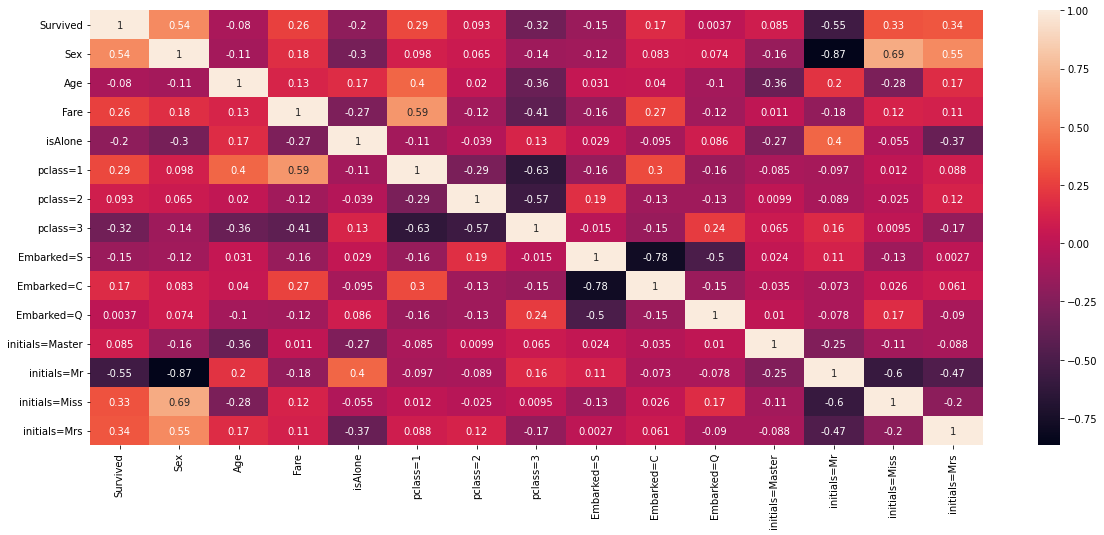

In [59]:
fig = plt.figure(figsize=(20,8))
print("\nHeat Map: \n")
sns.heatmap(dff.corr(),annot=True)
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
dff.insert(loc=0, column='x0', value=[1]*len(dff))
x=dff[[col for col in list(dff.columns) if col!='Survived']]

x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:]) 
y=dff['Survived']
x

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,x0,Sex,Age,Fare,isAlone,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,1,-0.737695,-0.524542,-0.502445,-1.231645,-0.565685,-0.510152,0.902587,0.615838,-0.482043,-0.307562,-0.216803,0.850532,-0.506655,-0.403962
1,1,1.355574,0.662296,0.786845,-1.231645,1.767767,-0.510152,-1.107926,-1.623803,2.074505,-0.307562,-0.216803,-1.175735,-0.506655,2.475480
2,1,1.355574,-0.227833,-0.488854,0.811922,-0.565685,-0.510152,0.902587,0.615838,-0.482043,-0.307562,-0.216803,-1.175735,1.973729,-0.403962
3,1,1.355574,0.439764,0.420730,-1.231645,1.767767,-0.510152,-1.107926,0.615838,-0.482043,-0.307562,-0.216803,-1.175735,-0.506655,2.475480
4,1,-0.737695,0.439764,-0.486337,0.811922,-0.565685,-0.510152,0.902587,0.615838,-0.482043,-0.307562,-0.216803,0.850532,-0.506655,-0.403962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,-0.737695,-0.153655,-0.386671,0.811922,-0.565685,1.960202,-1.107926,0.615838,-0.482043,-0.307562,-0.216803,-1.175735,-0.506655,-0.403962
887,1,1.355574,-0.747074,-0.044381,0.811922,1.767767,-0.510152,-1.107926,0.615838,-0.482043,-0.307562,-0.216803,-1.175735,1.973729,-0.403962
888,1,1.355574,-0.524542,-0.176263,-1.231645,-0.565685,-0.510152,0.902587,0.615838,-0.482043,-0.307562,-0.216803,-1.175735,1.973729,-0.403962
889,1,-0.737695,-0.227833,-0.044381,0.811922,1.767767,-0.510152,-1.107926,-1.623803,2.074505,-0.307562,-0.216803,0.850532,-0.506655,-0.403962


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_cv, y_train, y_cv = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=0
)

In [62]:
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [63]:
y_pred = model.predict(x_cv)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [64]:
print("Accuracy of Logistic Model: ",sum([y_pred==y_cv][0].values)/len(y_cv))

Accuracy of Logistic Model:  0.8116591928251121


In [65]:
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0].values)/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model.predict(x_train)==y_train][0].values)/len(y_train))

Overall Accuracy of Logistic Model on CV dataset:  0.8116591928251121
Overall Accuracy of Logistic Model on Train dataset:  0.8263473053892215


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv, y_pred)

true_pos_rate = len(y_pred[(y_cv==y_pred) & (y_pred==1)])/sum(y_cv==1)
true_neg_rate = len(y_pred[(y_cv==y_pred) & (y_pred==0)])/sum(y_cv==0)
false_pos_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==1)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) + len(y_pred[(y_cv==y_pred) & (y_pred==0)]))
false_neg_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==0)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==0)]) + len(y_pred[(y_cv==y_pred) & (y_pred==1)]))

In [67]:
confusion_matrix(y_cv, y_pred)

array([[117,  22],
       [ 20,  64]])

In [68]:
print(false_neg_rate, false_pos_rate, true_neg_rate, true_pos_rate)

0.23809523809523808 0.15827338129496402 0.841726618705036 0.7619047619047619


In [69]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Recall: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )

Recall: TP/(TP+FN) is :=  0.7619047619047619
Precision: TP/(TP+FP) is :=  0.7441860465116279
F1 Score: 2/(1/recall + 1/precision) is :=  0.7529411764705882


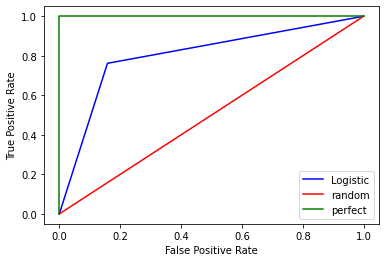

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_cv, y_pred)

plt.plot(fpr,tpr,'b-', label= 'Logistic')
plt.plot([0,1],[0,1],'r-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
print("AUC Score := ", roc_auc_score(y_cv, y_pred))

AUC Score :=  0.8018156903048989


In [72]:
x=dff[[col for col in list(dff.columns) if col!='Survived']]
x = sc_x.fit_transform(x) 
y=dff['Survived']

train_x,test_x,train_y,test_y=[None]*4
num_shuffles=300
shuffled = pd.DataFrame(columns=['Shuffle No','train_accuracy','cv_accuracy','train_recall','cv_recall','train_precision','cv_precision','train_f1score','cv_f1score','train_auc','cv_auc'])
for i in range(num_shuffles):
  train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=None,test_size=0.3,shuffle=True)
  model.fit(train_x,train_y)
  
  y_pred = model.predict(train_x)
  accuracy_train = sum([y_pred==train_y][0].values)/len(train_y)
  
  tr_precision = precision_score(train_y, y_pred)
  tr_recall = recall_score(train_y, y_pred)
  tr_f1score = f1_score(train_y, y_pred)
  tr_auc = roc_auc_score(train_y, y_pred)

  y_pred = model.predict(test_x)
  accuracy_cv = sum([y_pred==test_y][0].values)/len(test_y)

  cv_precision = precision_score(test_y, y_pred)
  cv_recall = recall_score(test_y, y_pred)
  cv_f1score = f1_score(test_y, y_pred)
  cv_auc = roc_auc_score(test_y, y_pred)

  shuffled.loc[len(shuffled.index)]=[int(i+1), accuracy_train, accuracy_cv, tr_recall, cv_recall, tr_precision, cv_precision, tr_f1score, cv_f1score, tr_auc, cv_auc]
shuffled.head(5)

,Shuffle No,train_accuracy,cv_accuracy,train_recall,cv_recall,train_precision,cv_precision,train_f1score,cv_f1score,train_auc,cv_auc
0,1.0,0.821830,0.828358,0.740586,0.747573,0.783186,0.793814,0.761290,0.770000,0.806491,0.813180
1,2.0,0.828250,0.809701,0.780992,0.790000,0.777778,0.724771,0.779381,0.755981,0.819630,0.805714
2,3.0,0.821830,0.791045,0.761317,0.757576,0.777311,0.700935,0.769231,0.728155,0.810922,0.784113
3,4.0,0.831461,0.805970,0.752033,0.625000,0.807860,0.789474,0.778947,0.697674,0.817661,0.765988
4,5.0,0.826645,0.809701,0.739496,0.721154,0.792793,0.773196,0.765217,0.746269,0.810008,0.793504


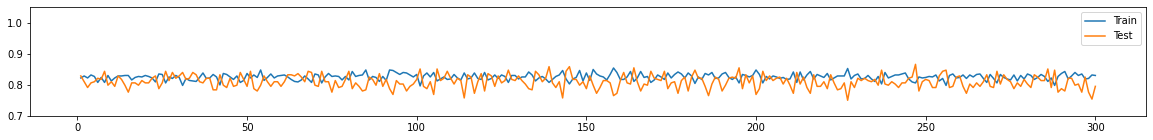

In [73]:
fig = plt.figure(figsize =(20, 2))
plt.plot(shuffled['Shuffle No'],shuffled['train_accuracy'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_accuracy'], label='Test')
plt.legend()
plt.ylim((0.7,1.05))
plt.show()

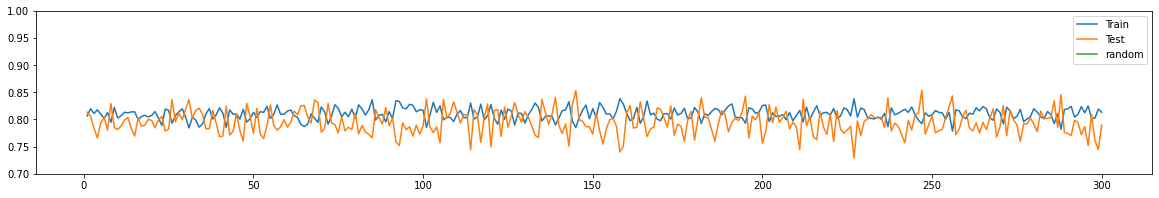

In [74]:

fig = plt.figure(figsize =(20, 3))
plt.plot(shuffled['Shuffle No'],shuffled['train_auc'], label='Train')
plt.plot(shuffled['Shuffle No'],shuffled['cv_auc'], label='Test')
plt.plot(shuffled['Shuffle No'],[0.5]*len(shuffled['Shuffle No']),label="random")
plt.legend()
plt.ylim((0.7,1))
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
import scipy.stats

def do_lreg(df):
    sample = df.sample(df.shape[0], replace=True)
    X_tr = sample[[c for c in sample.columns if c != 'y']]
    y_tr = sample.y
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X_tr, y_tr)
    params = [lr.intercept_[0]] +  list(lr.coef_[0])
    return params

def get_se(X, y):
    lr = LogisticRegression(penalty='l2', solver='liblinear')
    lr.fit(X, y)
    df = pd.DataFrame(X)
    df['y'] = y
    r_df = pd.DataFrame([do_lreg(df) for _ in range(100)])
    w = [lr.intercept_[0]] + list(lr.coef_[0])
    se = r_df.std()
    dof = X.shape[0] - X.shape[1] - 1
    summary = pd.DataFrame({
        'coeff': w,
        'se': se,
        'z': w / se,
        '.025': w - se,
        '.975': w + se,
        'df': [dof for _ in range(len(w))]
    })
    summary['P>|z|'] = scipy.stats.t.sf(abs(summary.z), df=summary.df)
    return summary

x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y = np.array(dff['Survived'].values)
logistic_coeff_summary = get_se(x, y)
logistic_coeff_summary['features'] = ['intercept']+list(dff.columns)[1:]
logistic_coeff_summary


,coeff,se,z,.025,.975,df,P>|z|,features
0,0.022039,0.133292,0.165346,-0.111252,0.155331,875,4.343548e-01,intercept
1,0.022039,0.133292,0.165346,-0.111252,0.155331,875,4.343548e-01,Survived
2,1.852715,0.223021,8.307373,1.629694,2.075736,875,1.851449e-16,Sex
3,-0.037660,0.008388,-4.489554,-0.046049,-0.029272,875,4.045836e-06,Age
4,0.001037,0.002268,0.457288,-0.001231,0.003306,875,3.237889e-01,Fare
5,0.628375,0.218119,2.880878,0.410256,0.846495,875,2.031289e-03,isAlone
6,1.244268,0.202398,6.147620,1.041870,1.446666,875,5.971190e-10,pclass=1
7,0.032864,0.131542,0.249832,-0.098679,0.164406,875,4.013879e-01,pclass=2
8,-1.255092,0.162338,-7.731367,-1.417430,-1.092755,875,1.459749e-14,pclass=3
9,-0.311626,0.141532,-2.201808,-0.453158,-0.170094,875,1.396960e-02,Embarked=S


In [76]:
drop_feat_pval = logistic_coeff_summary[logistic_coeff_summary['P>|z|']>0.05][['features','P>|z|']]
drop_feat_pval.values

array([['intercept', 0.43435480477149074],
       ['Survived', 0.43435480477149074],
       ['Fare', 0.3237889250886913],
       ['pclass=2', 0.4013879356706115],
       ['Embarked=C', 0.08200134426928708],
       ['Embarked=Q', 0.352140832326239],
       ['initials=Miss', 0.3513293447250616]], dtype=object)

In [77]:
#dff.drop(['Fare','pclass=1','initials=Miss','initials=Master'],axis=1,inplace=True)
x_new = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y_new = np.array(dff['Survived'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
x_train, x_cv, y_train, y_cv = train_test_split(
    x_new,
    y,
    test_size=0.25,
    random_state=0
)
model_new = LogisticRegression(penalty='l2', solver='liblinear')
model_new.fit(x_train,y_train)
y_pred = model_new.predict(x_cv)
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0])/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model_new.predict(x_train)==y_train][0])/len(y_train))
print("Recall on CV dataset: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision on CV dataset: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score on CV dataset: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )
print("AUC Score on CV dataset:= ", roc_auc_score(y_cv, y_pred))


Overall Accuracy of Logistic Model on CV dataset:  0.8071748878923767
Overall Accuracy of Logistic Model on Train dataset:  0.8248502994011976
Recall on CV dataset: TP/(TP+FN) is :=  0.7619047619047619
Precision on CV dataset: TP/(TP+FP) is :=  0.735632183908046
F1 Score on CV dataset: 2/(1/recall + 1/precision) is :=  0.7485380116959064
AUC Score on CV dataset:=  0.7982185680027407


In [78]:
y = np.array(dff['Survived'])
x = np.array(dff[[col for col in list(dff.columns) if col!='Survived']])
y_pred = model_new.predict(x)
print("Overall Accuracy of Logistic Model on dataset: ",sum([y_pred==y][0])/len(y))
print("Recall on dataset: TP/(TP+FN) is := ",len(y_pred[(y==y_pred) & (y_pred==1)])/( len(y_pred[(y==y_pred) & (y_pred==1)]) + len(y_pred[(y!=y_pred) & (y_pred==0)])))
print("Precision on dataset: TP/(TP+FP) is := ", len(y_pred[(y==y_pred) & (y_pred==1)]) / ( len(y_pred[(y==y_pred) & (y_pred==1)]) + len(y_pred[(y!=y_pred) & (y_pred==1)]) ))
print("F1 Score on dataset: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y, y_pred)) + (1/precision_score(y, y_pred))) )
print("AUC Score on dataset:= ", roc_auc_score(y, y_pred))
print("Features used in Final model: ",[col for col in list(dff.columns) if col!='Survived'])

Overall Accuracy of Logistic Model on dataset:  0.8204264870931538
Recall on dataset: TP/(TP+FN) is :=  0.7426900584795322
Precision on dataset: TP/(TP+FP) is :=  0.7791411042944786
F1 Score on dataset: 2/(1/recall + 1/precision) is :=  0.7604790419161678
AUC Score on dataset:=  0.8057712587479628
Features used in Final model:  ['x0', 'Sex', 'Age', 'Fare', 'isAlone', 'pclass=1', 'pclass=2', 'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q', 'initials=Master', 'initials=Mr', 'initials=Miss', 'initials=Mrs']


In [79]:
df_test = pd.read_csv("test.csv")
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [80]:
df_test.isna().sum()[df_test.isna().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [81]:
import itertools
listOLists = [df_test['Pclass'].unique(), df_test['Sex'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].mean()
    b=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].median()
    c=str((100*df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].isna().sum()/df_test['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence

,Pclass,Sex,mean_Age,median_age,% of Age missing
0,3,male,24.525104,24.0,58.13%
1,3,female,23.0734,22.0,25.58%
2,2,male,30.940678,28.0,4.65%
3,2,female,24.376552,24.0,1.16%
4,1,male,40.52,42.0,8.13%
5,1,female,41.333333,41.0,2.32%


In [82]:
for l in itertools.product(*listOLists):
  df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) & (df_test['Age'].isnull()),'Age'] = df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) , ['Age']].median()[0]

In [83]:
#df_test['Fare'].fillna(df_test['Fare'].mean, inplace=True)
df_test.isna().sum()[df_test.isna().sum()>0]


Fare       1
Cabin    327
dtype: int64

In [84]:
df_test.loc[df_test['Fare'].isnull(),'Fare']=7.8292

In [85]:
dff_test = df_test.copy()
dff_test['Sex']=dff_test['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff_test['pclass=1'] = (dff_test['Pclass']==1).astype('int')
dff_test['pclass=2'] = (dff_test['Pclass']==2).astype('int')
dff_test['pclass=3'] = (dff_test['Pclass']==3).astype('int')
dff_test['Embarked=S'] = (dff_test['Embarked']=='S').astype('int')
dff_test['Embarked=C'] = (dff_test['Embarked']=='C').astype('int')
dff_test['Embarked=Q'] = (dff_test['Embarked']=='Q').astype('int')
dff_test['initials'] = dff_test['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])
dff_test['initials=Master'] = (dff_test['initials']=='Master').astype('int')
dff_test['initials=Mr'] = (dff_test['initials']=='Mr').astype('int')
dff_test['initials=Miss'] = (dff_test['initials']=='Miss').astype('int')
dff_test['initials=Mrs'] = (dff_test['initials']=='Mrs').astype('int')
dff_test.head(3),dff_test.columns

(   PassengerId  Pclass                              Name  Sex   Age  SibSp  \
 0          892       3                  Kelly, Mr. James    0  34.5      0   
 1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   
 2          894       2         Myles, Mr. Thomas Francis    0  62.0      0   
 
    Parch  Ticket    Fare Cabin  ... pclass=2  pclass=3  Embarked=S  \
 0      0  330911  7.8292   NaN  ...        0         1           0   
 1      0  363272  7.0000   NaN  ...        0         1           1   
 2      0  240276  9.6875   NaN  ...        1         0           0   
 
    Embarked=C  Embarked=Q  initials  initials=Master initials=Mr  \
 0           0           1        Mr                0           1   
 1           0           0       Mrs                0           0   
 2           0           1        Mr                0           1   
 
    initials=Miss  initials=Mrs  
 0              0             0  
 1              0             1  
 2              

In [86]:
dff_test['family_size'] = dff_test['SibSp'] + dff_test['Parch'] +1
dff_test['family_size'] = dff_test['family_size'].apply(lambda x: 0 if x>1 else 1) 
dff_test.rename(columns = {'family_size':'isAlone'}, inplace=True)
dff_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials,initials=Master,initials=Mr,initials=Miss,initials=Mrs,isAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,...,1,0,0,1,Mr,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,Mrs,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,...,0,0,0,1,Mr,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,...,1,1,0,0,Mr,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,Mrs,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,NaN,...,1,1,0,0,Mr,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,...,0,0,1,0,Dona,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,1,0,0,Mr,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,NaN,...,1,1,0,0,Mr,0,1,0,0,1


In [87]:
set(dff_test.columns).difference(set(dff.columns))

{'Cabin',
 'Embarked',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'SibSp',
 'Ticket',
 'initials'}

In [88]:
dfff = dff_test.copy()
dfff.drop(['PassengerId','Pclass','Name','SibSp','initials','Parch','Cabin','Embarked', 'Ticket'],axis=1,inplace=True)
#dfff.drop(['PassengerId','Pclass','Name','SibSp','initials','Parch','Fare','Ticket','Cabin','Embarked',  'pclass=2', 'Embarked=S', 'Embarked=C', 'Embarked=Q','initials=Miss'],axis=1,inplace=True)
dfff.shape, dfff.columns

((418, 14),
 Index(['Sex', 'Age', 'Fare', 'pclass=1', 'pclass=2', 'pclass=3', 'Embarked=S',
        'Embarked=C', 'Embarked=Q', 'initials=Master', 'initials=Mr',
        'initials=Miss', 'initials=Mrs', 'isAlone'],
       dtype='object'))

In [89]:
dfff.insert(loc=0, column='x0', value=[1]*len(dfff))
dfff = dfff[[col for col in dff.columns if col !='Survived']]
dfff.columns==[col for col in dff.columns if col !='Survived']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [90]:
set(dfff.columns).difference(set(dff.columns))

set()

In [91]:
submisson_model = LogisticRegression(penalty='l2', solver='liblinear')
x = dff[[col for col in list(dff.columns) if col!='Survived']]
x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:]) 
y = np.array(dff['Survived'])
submisson_model.fit(x,y)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


LogisticRegression(solver='liblinear')

In [92]:
x_test = dfff.copy()
y_pred = submisson_model.predict(x_test)
x_test

,x0,Sex,Age,Fare,isAlone,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,1,0,34.5,7.8292,1,0,0,1,0,0,1,0,1,0,0
1,1,1,47.0,7.0000,0,0,0,1,1,0,0,0,0,0,1
2,1,0,62.0,9.6875,1,0,1,0,0,0,1,0,1,0,0
3,1,0,27.0,8.6625,1,0,0,1,1,0,0,0,1,0,0
4,1,1,22.0,12.2875,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,24.0,8.0500,1,0,0,1,1,0,0,0,1,0,0
414,1,1,39.0,108.9000,1,1,0,0,0,1,0,0,0,0,0
415,1,0,38.5,7.2500,1,0,0,1,1,0,0,0,1,0,0
416,1,0,24.0,8.0500,1,0,0,1,1,0,0,0,1,0,0


In [93]:
dff_test['Survived']=y_pred
y_pred.shape,dff_test.shape, dff_test.columns 
submission =dff_test.loc[:,['PassengerId','Survived']]

In [94]:
submission.to_csv('submission.csv',index=False)

In [95]:
d_train

,Survived,Sex,Age,Fare,isAlone,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials=Master,initials=Mr,initials=Miss,initials=Mrs
0,0,0,22.0,7.2500,0,0,0,1,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,0,0,0,0,1
2,1,1,26.0,7.9250,1,0,0,1,1,0,0,0,0,1,0
3,1,1,35.0,53.1000,0,1,0,0,1,0,0,0,0,0,1
4,0,0,35.0,8.0500,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,13.0000,1,0,1,0,1,0,0,0,0,0,0
887,1,1,19.0,30.0000,1,1,0,0,1,0,0,0,0,1,0
888,0,1,22.0,23.4500,0,0,0,1,1,0,0,0,0,1,0
889,1,0,26.0,30.0000,1,1,0,0,0,1,0,0,1,0,0


In [96]:
d_test = dff_test.loc[:,[col for col in list(d_train.columns) if col!='Survived']]
d_test.columns,[col for col in list(d_train.columns) if col!='Survived']

(Index(['Sex', 'Age', 'Fare', 'isAlone', 'pclass=1', 'pclass=2', 'pclass=3',
        'Embarked=S', 'Embarked=C', 'Embarked=Q', 'initials=Master',
        'initials=Mr', 'initials=Miss', 'initials=Mrs'],
       dtype='object'),
 ['Sex',
  'Age',
  'Fare',
  'isAlone',
  'pclass=1',
  'pclass=2',
  'pclass=3',
  'Embarked=S',
  'Embarked=C',
  'Embarked=Q',
  'initials=Master',
  'initials=Mr',
  'initials=Miss',
  'initials=Mrs'])

In [97]:
#d_test.insert(loc=0, column='x0', value=[1]*len(d_test))
#d_train.insert(loc=0, column='x0', value=[1]*len(d_train))
x_train = d_train[[col for col in list(d_train.columns) if col!='Survived']]
#print("All columns matching for Train & Test set: ",(x.columns == d_test.columns).all(), x.shape,d_test.shape)
x_train.loc[:,list(x_train.columns)[1:]] = pd.DataFrame(data=sc_x.fit_transform(x_train.loc[:,list(x_train.columns)[1:]]) , columns=list(x_train.columns)[1:])
x_test= d_test.copy()
x_test.loc[:,list(x_test.columns)[1:]] = pd.DataFrame(data=sc_x.fit_transform(x_test.loc[:,list(x_test.columns)[1:]]) , columns=list(x_test.columns)[1:])
x_train.shape,x_test.shape, x_train.columns == x_test.columns, d_train.columns, d_test.columns

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


((891, 14),
 (418, 14),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]),
 Index(['Survived', 'Sex', 'Age', 'Fare', 'isAlone', 'pclass=1', 'pclass=2',
        'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q', 'initials=Master',
        'initials=Mr', 'initials=Miss', 'initials=Mrs'],
       dtype='object'),
 Index(['Sex', 'Age', 'Fare', 'isAlone', 'pclass=1', 'pclass=2', 'pclass=3',
        'Embarked=S', 'Embarked=C', 'Embarked=Q', 'initials=Master',
        'initials=Mr', 'initials=Miss', 'initials=Mrs'],
       dtype='object'))

In [98]:
y=np.array(d_train['Survived'])
x_train = np.array(x_train)
w =  np.random.randn(len(x_train[0]))
grad_sq_sum=0
alpha = 0.1
w_ = np.arange(0,len(w))
x_train.shape, x_test.shape

((891, 14), (418, 14))

In [99]:
from tqdm import tqdm 
norm_vals = []
alphas = []
weights = []
for _ in tqdm(range(100000)):
    sigmoid_wTx = np.dot(x_train,w.T)                       # Sigmoid(wTx) = p_i
    grad = np.dot(x_train.T,y - sigmoid_wTx)
    w_ = w - (alpha*(grad+(2*w)))/len(x_train)                    # W_ = w - learnRate * (gradient + 2*w)   ---------- Ridge
    #w_ = w - alpha*(grad+[1 if i>0 else -1 for i in w])   # W_ = w - learnRate * (gradient + (|w|/w) )   ----- Lasso
    grad_sq_sum = grad_sq_sum + abs(grad)                 # learnRate = 1/sqrt( |g1| + |g2| + |g3| +..|gk| ) at k+1_th iteration  
    #grad_sq_sum = grad_sq_sum + (grad)**2                 # learnRate = 1/sqrt( |g1|^2 + |g2|^2 + |g3|^2 +..|gk|^2 ) at k+1_th iteration  
    alpha = 0.1/np.sqrt(grad_sq_sum)          
    alphas.append(alpha)
    norm_vals.append(np.linalg.norm(w_-w))
    if np.linalg.norm(w_-w)<pow(10,-4):                   # checking if change in ||W - w||^2 < 0.0001, then terminate
        break
    w = w_
    weights.append(w_)

100%|██████████| 100000/100000 [00:13<00:00, 7645.04it/s]


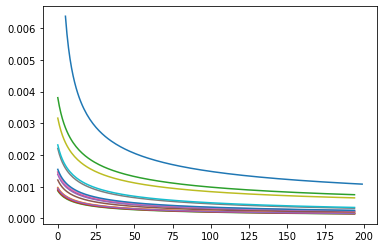

array([-7.68638465, -3.81090988, -7.80656501,  7.10616084, -8.91030739,
        4.43235387,  7.79703663,  5.56525883, -6.71638284,  5.36275218,
        7.55827543,  9.40974924, -7.57634788, -8.53598341])

In [100]:
plt.plot(np.arange(5,200),norm_vals[5:200],alphas[5:200])
plt.show()
w_

In [101]:
fpr=[]
tpr=[]
y_pred = 1/(1+np.exp(-np.dot(x_train,w_)))
for threshold in np.arange(0,1,0.001):
    pred_label = np.array([1 if i>threshold else 0 for i in y_pred])
    recall = len(pred_label[(y==pred_label) & (pred_label==1)])/( len(pred_label[(y==pred_label) & (pred_label==1)]) + len(pred_label[(y!=pred_label) & (pred_label==0)]))
    precision = len(pred_label[(y==pred_label) & (pred_label==1)]) / ( len(pred_label[(y==pred_label) & (pred_label==1)]) + len(pred_label[(y!=pred_label) & (pred_label==1)]) )
    true_pos_rate = len(pred_label[(y==pred_label) & (pred_label==1)])/sum(y==1)
    true_neg_rate = len(pred_label[(y==pred_label) & (pred_label==0)])/sum(pred_label==0)
    false_pos_rate = len(pred_label[(y!=pred_label) & (pred_label==1)])/(len(pred_label[(y!=pred_label) & (pred_label==1)]) + len(pred_label[(y==pred_label) & (pred_label==0)]))
    false_neg_rate = len(pred_label[(y!=pred_label) & (pred_label==0)])/(len(pred_label[(y!=pred_label) & (pred_label==0)]) + len(pred_label[(y==pred_label) & (pred_label==1)]))
    fpr.append(false_pos_rate);tpr.append(true_pos_rate)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == "__main__":


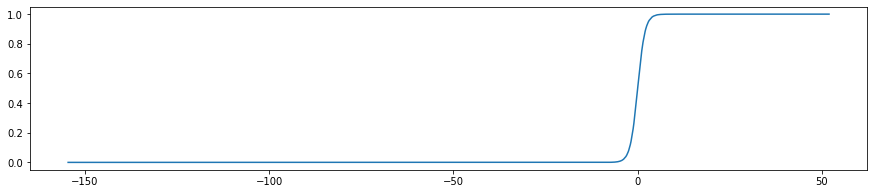

In [102]:
fig = plt.figure(figsize=(15,3))
plt.plot(np.sort(np.dot(x_train,w_)), [1/(1+np.exp(-i)) for i in np.sort(np.dot(x_train,w_))])
plt.show()

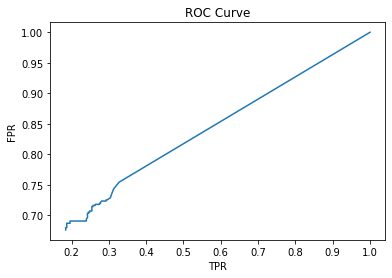

In [103]:
plt.plot(tpr,fpr)
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ROC Curve")
plt.show()

In [104]:
test_pred = np.dot(x_test,w_)
test_labels = [1 if pred>0.5 else 0 for pred in test_pred]
dff_test['Survived'] = test_labels
submission_new = dff_test[['PassengerId','Survived']]
#submission_new.to_csv('submission.csv',index=False)

In [105]:
import random
col = d_train.columns[d_train.columns!='Survived']
stacking_classifier_output = pd.DataFrame()
random.shuffle(list(col))
model_columns=[]
level1_models=[]
for i in tqdm(range(50)):
    x_new = d_train.loc[:,random.sample(list(col),5)]  
    x_new.insert(loc=0, column='x0', value=[1]*len(x_new))
    x_train, x_cv, y_train, y_cv = train_test_split(x_new,y,test_size=0.35,random_state=0)
    model_new = LogisticRegression(penalty='l2', solver='liblinear')
    model_new.fit(x_train,y_train)
    y_pred = model_new.predict(x_cv)
    stacking_classifier_output.loc[:,'Logistic model'+str(i+1)] = list(model_new.predict_proba(x_new)[:,0])
    model_columns.append(list(x_new.columns))
    level1_models.append(model_new)

# Logistic Regression Prediction on the stacked-Dataset
stacking_classifier_output.insert(loc=0, column='x0', value=[1]*len(stacking_classifier_output))
x_train, x_cv, y_train, y_cv = train_test_split(stacking_classifier_output,d_train['Survived'],test_size=0.35,random_state=0)
meta_classifier= LogisticRegression(penalty='l2', solver='liblinear')
meta_classifier.fit(x_train,y_train)
y_pred = meta_classifier.predict(x_cv)
sum([y_pred==y_cv][0])/len(y_cv)

100%|██████████| 50/50 [00:00<00:00, 101.73it/s]


0.8044871794871795

In [106]:
stacking_classifier_output

,x0,Logistic model1,Logistic model2,Logistic model3,Logistic model4,Logistic model5,Logistic model6,Logistic model7,Logistic model8,Logistic model9,...,Logistic model41,Logistic model42,Logistic model43,Logistic model44,Logistic model45,Logistic model46,Logistic model47,Logistic model48,Logistic model49,Logistic model50
0,1,0.917145,0.807918,0.914324,0.889219,0.824161,0.840682,0.807271,0.780054,0.759676,...,0.862056,0.841235,0.836165,0.867859,0.628115,0.922259,0.836772,0.873719,0.915012,0.900698
1,1,0.089125,0.104057,0.067818,0.068342,0.065455,0.058047,0.435620,0.094754,0.093505,...,0.102739,0.261380,0.086834,0.144325,0.340252,0.071741,0.141736,0.100581,0.142911,0.155363
2,1,0.483122,0.807405,0.421698,0.350946,0.824161,0.417283,0.517993,0.809016,0.821328,...,0.335669,0.277334,0.403769,0.350553,0.747528,0.428523,0.337352,0.329365,0.504198,0.354241
3,1,0.171190,0.112645,0.118126,0.120415,0.123990,0.100496,0.427319,0.094754,0.093505,...,0.096465,0.261380,0.090458,0.318213,0.545960,0.119631,0.274726,0.094775,0.233752,0.180202
4,1,0.917145,0.807310,0.914324,0.889219,0.824161,0.857380,0.865350,0.809016,0.821328,...,0.894326,0.827456,0.848122,0.867859,0.776953,0.922259,0.862673,0.902011,0.926828,0.846735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0.266655,0.652439,0.800470,0.889219,0.649768,0.857380,0.585971,0.657706,0.673733,...,0.875349,0.242586,0.846543,0.250306,0.738823,0.502408,0.840152,0.727165,0.216316,0.342951
887,1,0.171190,0.511255,0.118126,0.120415,0.519445,0.168703,0.097053,0.469404,0.491629,...,0.068475,0.277334,0.156092,0.350553,0.663767,0.119631,0.268024,0.068619,0.177467,0.306457
888,1,0.483122,0.795322,0.421698,0.350946,0.824161,0.385960,0.470878,0.780054,0.759676,...,0.315191,0.297762,0.372841,0.350553,0.579406,0.428523,0.290718,0.310258,0.491697,0.434229
889,1,0.536771,0.511255,0.515673,0.521295,0.348485,0.484454,0.375708,0.469404,0.491629,...,0.540252,0.827456,0.604070,0.703566,0.533769,0.550099,0.684777,0.569255,0.579806,0.816701


In [107]:
d_test['Fare'].fillna(value=d_test['Fare'].mean(), inplace=True)
d_test.isna().sum()

Sex                0
Age                0
Fare               0
isAlone            0
pclass=1           0
pclass=2           0
pclass=3           0
Embarked=S         0
Embarked=C         0
Embarked=Q         0
initials=Master    0
initials=Mr        0
initials=Miss      0
initials=Mrs       0
dtype: int64

In [108]:
stacking_classifier_prediction = pd.DataFrame()
d_test.insert(loc=0, column='x0', value=[1]*len(d_test))
for i in tqdm(range(len(model_columns))):
    x_new = d_test.loc[:,model_columns[i]]
    stacking_classifier_prediction.loc[:,'Logistic model'+str(i+1)] = list(level1_models[i].predict_proba(x_new)[:,0])

100%|██████████| 50/50 [00:00<00:00, 311.92it/s]


In [109]:
stacking_classifier_prediction

,Logistic model1,Logistic model2,Logistic model3,Logistic model4,Logistic model5,Logistic model6,Logistic model7,Logistic model8,Logistic model9,Logistic model10,...,Logistic model41,Logistic model42,Logistic model43,Logistic model44,Logistic model45,Logistic model46,Logistic model47,Logistic model48,Logistic model49,Logistic model50
0,0.889662,0.668885,0.914324,0.868329,0.668957,0.857380,0.863501,0.809016,0.683471,0.853650,...,0.893869,0.870053,0.848193,0.867859,0.693494,0.870920,0.846829,0.901036,0.868884,0.858924
1,0.483122,0.363941,0.421698,0.350946,0.380319,0.282761,0.905686,0.333863,0.328999,0.334005,...,0.451948,0.261380,0.278688,0.318213,0.727726,0.428523,0.419439,0.437867,0.604837,0.256680
2,0.758261,0.478867,0.800470,0.868329,0.444404,0.857380,0.820476,0.657706,0.492380,0.606210,...,0.941164,0.870053,0.847601,0.824506,0.784915,0.722637,0.894572,0.943363,0.683968,0.856704
3,0.917145,0.806844,0.914324,0.889219,0.824161,0.857380,0.831043,0.809016,0.821328,0.893666,...,0.875349,0.827456,0.847928,0.867859,0.749215,0.922259,0.845767,0.885347,0.919748,0.845955
4,0.483122,0.357976,0.421698,0.350946,0.380319,0.282761,0.804428,0.333863,0.328999,0.334005,...,0.315191,0.261380,0.276073,0.318213,0.613195,0.428523,0.313731,0.310258,0.528244,0.246921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.917145,0.807310,0.914324,0.889219,0.824161,0.857380,0.816946,0.809016,0.821328,0.893666,...,0.867510,0.827456,0.848122,0.867859,0.740282,0.922259,0.840111,0.878486,0.916936,0.846735
414,0.089125,0.415603,0.067818,0.068342,0.348485,0.484454,0.410587,0.469404,0.491629,0.184981,...,0.104909,0.242586,0.556707,0.144325,0.349719,0.071741,0.104090,0.102585,0.144449,0.169413
415,0.917145,0.807918,0.914324,0.889219,0.824161,0.857380,0.878614,0.809016,0.821328,0.893666,...,0.901797,0.827456,0.848376,0.867859,0.789494,0.922259,0.870155,0.908599,0.929741,0.847750
416,0.917145,0.807310,0.914324,0.889219,0.824161,0.857380,0.816946,0.809016,0.821328,0.893666,...,0.867510,0.827456,0.848122,0.867859,0.740282,0.922259,0.840111,0.878486,0.916936,0.846735


In [110]:
stacking_classifier_prediction.insert(loc=0, column='x0', value=[1]*len(stacking_classifier_prediction))
y_pred = meta_classifier.predict(stacking_classifier_prediction)

In [111]:
df_test.shape, len(y_pred)

((418, 11), 418)